> 순서
1. 스무고개 방식으로 특정 feature(컬럼)값을 기준으로 데이터를 나눠나간다
2. 노드를 2진으로 계속 나눠나간다
3. 최종적으로 나무를 거꾸로 세운 사다리타기 구조가 생성
4. 데이터가 사다리를 타고 내려오면서 최종노드로 할당
5. 해당 노드를 통해 최종 target 값을 결정
<hr>
- 노드 : 데이터가 모여있는 마디
- 엣지 : 가지
- parent node : 자신보다 상위 node
- child node : 자신보다 하위 node
- leaf node : 최종 node
- root node : 최상위 node
- 순수 node : 하나의 class 데이터로 구성된 node
- leaf node가 순수노드가 아닌경우 class의 발생 확률로 값을 리턴
<hr>
- 특정 node를 어떤 컬럼(피쳐) 값으로 나눌지 결정해야 함\
=> entropy를 가장 낮게 만드는 feature를 기준으로 해당 node를 나눈다.
- information gain : 분기를 해서 혼잡도가 낮아진 크기
- gain ratio : 혼잡도가 줄어든 비율, information gain을 비율값으로 계산한 것.
- dt algorithm : entropy를 계속 낮춰가는 알고리즘

- gini index : 혼잡도 , 불확실성, 무질서를 측정하는 지표
- entropy 보다 계산이 쉽고 빠르다

> 과적합
- 모델이 train data에 과도하게 학습이 되는 경우
- 과적합되면 모델이 train data만 잘 맞추고 일반데이터에 예측 성능이 떨어진다.
- 모델을 과도하게 학습시켜서 복잡해지면 과적합되기 쉽다

> 과소적합
- 모델이 충분히 학습되지 못해서 train data와 test data 모두 예측 성능이 떨어지는 것

> 최적합 모델
- 모델 최적화해서 최적합 모델로 만들어야함.

> 과적합 해소
- 데이터를 많이 확보
- 모델의 복잡도를 낮춘다

> 과소적합 해소
- 학습을 더 시킨다 (= 모델을 복잡하게 만든다)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:\\Users\\M\\Machine_L\\data\\kyphosis.csv')
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


## Kyphosis라는 질병의 발생여부를 예측하는 decisiontree 모델을 학습시키고 모델의 성능을 평가하시오.
- Kyphosis : 척추질환
- age : 기간
- number : 특정한 관절의 수
- start : 시작시점의 척추관절 수

In [5]:
#1. 전처리 - 특별히 할 거 없음
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [6]:
#2. X, y 설정
X = df.drop('Kyphosis', axis = 1)
y = df.Kyphosis

In [8]:
# y라벨 인코딩
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le_y = le.fit_transform(y)

In [9]:
#3. train, test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, le_y, test_size = 0.2, random_state = 2024)

In [15]:
#4. 모델 학습
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [16]:
#5. 예측
pred = dt.predict(X_test)

In [17]:
#6. 검증
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.94      0.81      0.87        21
           1       0.43      0.75      0.55         4

    accuracy                           0.80        25
   macro avg       0.69      0.78      0.71        25
weighted avg       0.86      0.80      0.82        25



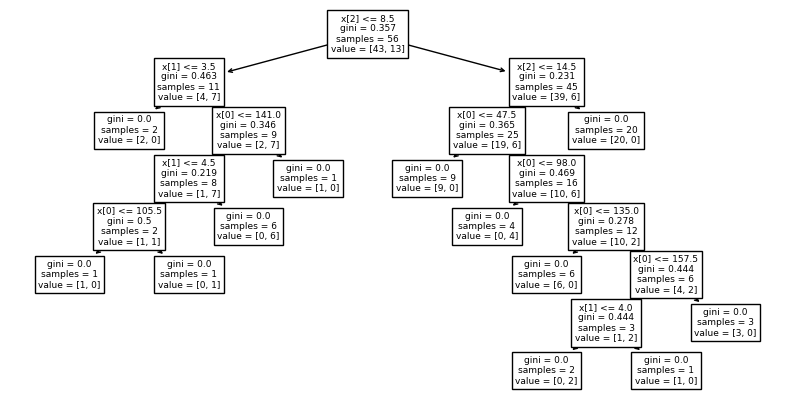

In [18]:
#7. 트리계열은 시각화 가능!!!@@@@@@@@@@@@@@@@@@@@
from sklearn.tree import plot_tree
plt.figure(figsize = (10,5))
plot_tree(dt)
plt.show()

In [20]:
dt.feature_importances_

array([0.50829656, 0.20351999, 0.28818344])

In [22]:
X.columns

Index(['Age', 'Number', 'Start'], dtype='object')

> 앙상블 ensemble

In [28]:
import sklearn
dir(sklearn.ensemble)

['AdaBoostClassifier',
 'AdaBoostRegressor',
 'BaggingClassifier',
 'BaggingRegressor',
 'BaseEnsemble',
 'ExtraTreesClassifier',
 'ExtraTreesRegressor',
 'GradientBoostingClassifier',
 'GradientBoostingRegressor',
 'HistGradientBoostingClassifier',
 'HistGradientBoostingRegressor',
 'IsolationForest',
 'RandomForestClassifier',
 'RandomForestRegressor',
 'RandomTreesEmbedding',
 'StackingClassifier',
 'StackingRegressor',
 'VotingClassifier',
 'VotingRegressor',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_bagging',
 '_base',
 '_forest',
 '_gb',
 '_gb_losses',
 '_gradient_boosting',
 '_hist_gradient_boosting',
 '_iforest',
 '_stacking',
 '_voting',
 '_weight_boosting']

In [30]:
#4. 모델학습
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [31]:
#5. 예측
pred = rfc.predict(X_test)

In [32]:
#6. 검증
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        21
           1       0.50      0.50      0.50         4

    accuracy                           0.84        25
   macro avg       0.70      0.70      0.70        25
weighted avg       0.84      0.84      0.84        25



In [34]:
rfc.feature_importances_

array([0.38064123, 0.25735483, 0.36200394])

In [35]:
X.columns

Index(['Age', 'Number', 'Start'], dtype='object')